In [2]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.warp import reproject, Resampling
from rasterio.enums import Resampling as R
import math

In [3]:
place = "Nairobi, Kenya"

In [4]:
green_tags = {
    "leisure": ["park", "garden", "golf_course", "playground"],
    "landuse": ["forest", "grass", "recreation_ground"],
    "natural": ["wood", "grassland", "scrub"]
} 

In [5]:
gdf = ox.features_from_place(place, tags=green_tags)

In [6]:
green_space = gdf.reset_index()

In [7]:
green_space

,element,id,geometry,leisure,name,landuse,produce,note,check_date,garden:type,...,security,security:black_spot,security:description,place,boundary,golf,layer,kerb,traffic_calming,bridge
0,node,612007002,POINT (36.794 -1.3187),park,Silanga Open Ground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,612007090,POINT (36.796 -1.3116),playground,Laini Saba Ground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,612007838,POINT (36.787 -1.3127),NaN,Sisi Kwa Sisi Grounds,recreation_ground,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,612008447,POINT (36.78 -1.3161),garden,Guava Tree and Kales,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,612008461,POINT (36.787 -1.3158),garden,NaN,NaN,banana;sweet potatoes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,way,1419622126,"POLYGON ((36.807 -1.3027, 36.807 -1.3026, 36.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,way,1419622127,"POLYGON ((36.806 -1.3023, 36.807 -1.3023, 36.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,way,1419622515,"POLYGON ((36.803 -1.3008, 36.803 -1.3008, 36.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,way,1419622516,"POLYGON ((36.804 -1.3018, 36.804 -1.3019, 36.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
green_space["geometry"].isna().sum()

0

In [9]:
green_space=green_space["geometry"]

In [10]:
green_space=green_space.to_frame()

In [11]:
green_space

,geometry
0,POINT (36.794 -1.3187)
1,POINT (36.796 -1.3116)
2,POINT (36.787 -1.3127)
3,POINT (36.78 -1.3161)
4,POINT (36.787 -1.3158)
...,...
981,"POLYGON ((36.807 -1.3027, 36.807 -1.3026, 36.8..."
982,"POLYGON ((36.806 -1.3023, 36.807 -1.3023, 36.8..."
983,"POLYGON ((36.803 -1.3008, 36.803 -1.3008, 36.8..."
984,"POLYGON ((36.804 -1.3018, 36.804 -1.3019, 36.8..."


In [12]:
type(green_space)

geopandas.geodataframe.GeoDataFrame

In [18]:
green_space_points = green_space[green_space.geometry.type=="Point"]

In [19]:
green_space_points

,geometry
0,POINT (36.794 -1.3187)
1,POINT (36.796 -1.3116)
2,POINT (36.787 -1.3127)
3,POINT (36.78 -1.3161)
4,POINT (36.787 -1.3158)
...,...
236,POINT (36.93 -1.1809)
237,POINT (36.931 -1.1822)
238,POINT (36.934 -1.1799)
239,POINT (36.816 -1.2724)


In [20]:
green_space_poly = green_space[green_space.geometry.type=="Polygon"]

In [21]:
green_space_poly

,geometry
241,"POLYGON ((36.804 -1.2761, 36.803 -1.2782, 36.8..."
242,"POLYGON ((36.7 -1.3249, 36.705 -1.3231, 36.706..."
244,"POLYGON ((36.73 -1.3115, 36.73 -1.3112, 36.73 ..."
245,"POLYGON ((36.804 -1.2698, 36.804 -1.2698, 36.8..."
246,"POLYGON ((36.698 -1.3477, 36.699 -1.3477, 36.6..."
...,...
981,"POLYGON ((36.807 -1.3027, 36.807 -1.3026, 36.8..."
982,"POLYGON ((36.806 -1.3023, 36.807 -1.3023, 36.8..."
983,"POLYGON ((36.803 -1.3008, 36.803 -1.3008, 36.8..."
984,"POLYGON ((36.804 -1.3018, 36.804 -1.3019, 36.8..."


In [23]:
green_space_points = green_space_points.to_crs(epsg=32737)

In [24]:
green_space_points["geometry"] = green_space_points.buffer(3)

In [25]:
green_space_points

,geometry
0,"POLYGON ((5.88e+05 9.85e+06, 5.88e+05 9.85e+06..."
1,"POLYGON ((5.89e+05 9.86e+06, 5.89e+05 9.86e+06..."
2,"POLYGON ((5.88e+05 9.85e+06, 5.88e+05 9.85e+06..."
3,"POLYGON ((5.87e+05 9.85e+06, 5.87e+05 9.85e+06..."
4,"POLYGON ((5.88e+05 9.85e+06, 5.88e+05 9.85e+06..."
...,...
236,"POLYGON ((6.04e+05 9.87e+06, 6.04e+05 9.87e+06..."
237,"POLYGON ((6.04e+05 9.87e+06, 6.04e+05 9.87e+06..."
238,"POLYGON ((6.04e+05 9.87e+06, 6.04e+05 9.87e+06..."
239,"POLYGON ((5.91e+05 9.86e+06, 5.91e+05 9.86e+06..."


In [26]:
green_space_points = green_space_points.to_crs(green_space_poly.crs)

In [27]:
green_space_points

,geometry
0,"POLYGON ((39.794 -1.3187, 39.794 -1.3187, 39.7..."
1,"POLYGON ((39.796 -1.3116, 39.796 -1.3116, 39.7..."
2,"POLYGON ((39.787 -1.3127, 39.787 -1.3127, 39.7..."
3,"POLYGON ((39.78 -1.3161, 39.78 -1.3161, 39.765..."
4,"POLYGON ((39.787 -1.3158, 39.787 -1.3158, 39.7..."
...,...
236,"POLYGON ((39.93 -1.1809, 39.93 -1.1809, 39.916..."
237,"POLYGON ((39.931 -1.1822, 39.931 -1.1822, 39.9..."
238,"POLYGON ((39.934 -1.1799, 39.934 -1.1799, 39.9..."
239,"POLYGON ((39.816 -1.2724, 39.816 -1.2724, 39.8..."


In [28]:
green_spaces = pd.concat([green_space_points,green_space_poly], ignore_index = "True")

In [29]:
green_spaces

,geometry
0,"POLYGON ((39.794 -1.3187, 39.794 -1.3187, 39.7..."
1,"POLYGON ((39.796 -1.3116, 39.796 -1.3116, 39.7..."
2,"POLYGON ((39.787 -1.3127, 39.787 -1.3127, 39.7..."
3,"POLYGON ((39.78 -1.3161, 39.78 -1.3161, 39.765..."
4,"POLYGON ((39.787 -1.3158, 39.787 -1.3158, 39.7..."
...,...
980,"POLYGON ((36.807 -1.3027, 36.807 -1.3026, 36.8..."
981,"POLYGON ((36.806 -1.3023, 36.807 -1.3023, 36.8..."
982,"POLYGON ((36.803 -1.3008, 36.803 -1.3008, 36.8..."
983,"POLYGON ((36.804 -1.3018, 36.804 -1.3019, 36.8..."


In [30]:
green_space.to_file("../data/processed/nairobi_green_spaces.geojson", driver="GeoJSON")

In [29]:
lst = "../scripts/outputs1/LST_Celsius.tif"

In [30]:
with rasterio.open(lst) as src:
    lst = src.read(1, masked=True)
    meta = src.meta
    

In [31]:
q_low, q_high = np.nanquantile(lst, [0.25, 0.75])
uhi_class = np.where(lst <= q_low, 1, 
                    np.where(lst>=q_high, 3,
                             2))



C:\Users\ADMIN\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [33]:
meta.update(dtype=rasterio.uint8,count=1)
output_uhi = "../outputs/rasters/UHI_classified.tif"
with rasterio.open(output_uhi, "w", **meta) as dst:
    dst.write(uhi_class.astype(rasterio.uint8), 1)
print(f" UHI classification saved -> {output_uhi}")

 UHI classification saved -> ../outputs/rasters/UHI_classified.tif


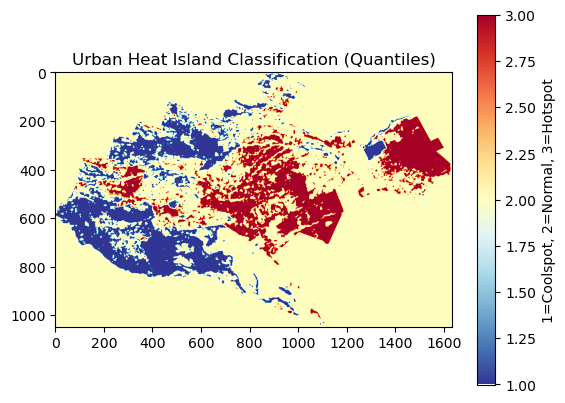

In [42]:
plt.imshow(uhi_class, cmap="RdYlBu_r")
plt.colorbar(label="1=Coolspot, 2=Normal, 3=Hotspot")

plt.title("Urban Heat Island Classification (Quantiles)")

plt.show()

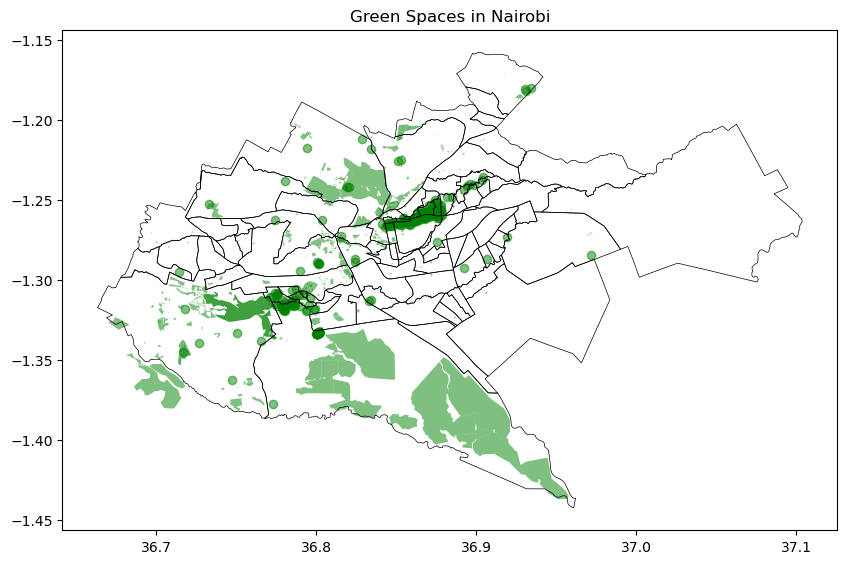

In [47]:
wards = gpd.read_file("../data/raw/Nairobi_wards/Nairobi_wards.shp")
greenspace = gpd.read_file("../data/processed/nairobi_green_spaces.geojson").to_crs(wards.crs)
fig, ax = plt.subplots(figsize=(10,10))
wards.boundary.plot(ax=ax, color="black", linewidth=0.5)
greenspace.plot(ax=ax, color="green", alpha=0.5)
ax.set_title("Green Spaces in Nairobi")
plt.show()
